**Updating beliefs based on data**

You have a bag with three different types of coin: blue, red and green. You know the proportion of coins of each type and the probability of heads for each coin. (You can use the widgets to control these values.)

In [235]:
import random
def choose_coin():
    assert prob_red.value + prob_blue.value < 1.0, "Must leave some mass for green"
    uar = random.random()
    if uar < prob_blue.value:
        return 'B'
    if uar < prob_blue.value + prob_red.value:
        return 'R'
    return 'G'

def flip_coin(coin):
    uar = random.random()
    if coin == 'R':
        if uar < prob_head_red.value:
            return 'H'
    elif coin == 'B':
        if uar < prob_head_blue.value:
            return 'H'
    elif coin == 'G':
        if uar < prob_head_green.value:
            return 'H'
    return 'T'

In [236]:
import ipywidgets as widgets
from IPython import display
prob_blue = widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value=0.33, description='prob_blue')
prob_red = widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value=0.33, description='prob_red')
prob_head_blue = widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value=0.4, description='head_blue')
prob_head_red = widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value=0.5, description='head_red')
prob_head_green = widgets.FloatSlider(min=0.0, max=1.0, step=0.01, value=0.6, description='head_green')



In [237]:
# Block for plotting our current posterior distribution over coins.
%matplotlib inline
import time
import pylab as pl
import matplotlib.colors as mcolors
pl.rcParams['figure.figsize'] = [10, 8]
pl.rcParams["font.family"] = "sans-serif"
pl.rcParams["lines.linewidth"] = 2.5

def make_plot(hypotheses):
    lines = []
    hypotheses = hypotheses
    def update_plot(observations, posteriors):
        pl.suptitle('\n'.join([observations[i:i+51] for i in range(0, len(observations)+1, 51)]), fontsize=12)
        pl.xlim((0,1.0))
        pl.ylim((0,1.0))
        pl.xticks(ticks=hypotheses, labels=['B', 'R', 'G'])
        for line in lines:
            line.remove()
        lines.clear()
        for j, (x_elem, y_elem) in enumerate(zip(hypotheses, posteriors)):
            lines.append(pl.stem([x_elem], [y_elem], basefmt=' ', linefmt='C%d-' %j, 
                                         markerfmt='C%do' % j, use_line_collection=True))
        display.display(pl.gcf()) 
        display.clear_output(wait=True)
    return update_plot
            

In [238]:
def infer_which_coin_was_chosen(observations, priors, conditionals, threshold=0.99):
    # Iterate over observations updating the posterior and the plot
    for i, observation in enumerate(observations):
        posteriors = compute_posteriors(priors, conditionals, observation)
        update_plot('%s %s' % (observations[:i], observations[i:]), posteriors)
        priors = posteriors
        if max(priors) > threshold:
            break
    return ('B' if posteriors.argmax() == 0 else ('R' if posteriors.argmax() == 1 else 'G'), i+1, posteriors.max())

In [239]:
def output_decision(selected, flips_used, posterior, coin):
    print("Decided the coin is %s after %d flips and with posterior belief %.3f. Coin is %s." % (selected, flips_used, posterior, coin))

In [240]:
# Set up widgets to control the parameters
display.display(prob_blue, prob_red, prob_head_blue, prob_head_red, prob_head_green)

FloatSlider(value=0.33, description='prob_blue', max=1.0, step=0.01)

FloatSlider(value=0.33, description='prob_red', max=1.0, step=0.01)

FloatSlider(value=0.4, description='head_blue', max=1.0, step=0.01)

FloatSlider(value=0.5, description='head_red', max=1.0, step=0.01)

FloatSlider(value=0.6, description='head_green', max=1.0, step=0.01)

In [241]:
import numpy as np
def compute_posteriors(priors, conditionals, observation):
    joints = priors * conditionals[0 if observation == 'H' else 1]
    return joints / joints.sum(0)

# Initially our best guess must be the prior
priors = np.array([prob_blue.value, prob_red.value, 1 - prob_blue.value - prob_red.value], dtype=float)

conditionals = np.array([[prob_head_blue.value, prob_head_red.value, prob_head_green.value],
                        [1 - prob_head_blue.value, 1 - prob_head_red.value, 1 - prob_head_green.value]], dtype=float)


In [254]:
# Select a coin at random from prior
coin = choose_coin()
# Generate some observations according to the coin's distribution
sample_size = 100
observations = ''.join([flip_coin(coin) for i in range(sample_size)])
print('Selected coin %s and generated %d observations.' % (coin, len(observations)))

Selected coin B and generated 100 observations.


Decided the coin is R after 100 flips and with posterior belief 0.779. Coin is B.


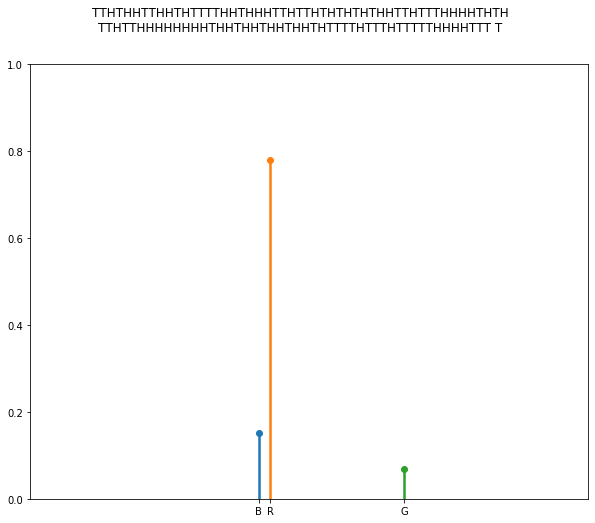

In [255]:
# Create a plot that tracks the posterior over the different coin's
update_plot = make_plot([prob_head_blue.value, prob_head_red.value, prob_head_green.value])
# Initialize the distribution over coins with prior
update_plot(observations, priors) 
time.sleep(1)
# Incrementally take the observations into account and update posterior and plot
selected, flips_used, posterior = infer_which_coin_was_chosen(observations, priors, conditionals, threshold=0.9)
output_decision(selected, flips_used, posterior, coin)